In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygenstability as pgs

from mcf import MCF, SBM

# Definition of stochastic block models (SBMs)

We define four different models for our experiments:

- Erdös-Renyi (Er) model
- single-scale stochastic block model (sSBM)
- multiscale stochastic block model (mSBM)
- non-hierarchical stochastic block model (nh-mSBM)

In [5]:
# define number of nodes and expected number of edges
N = 270
N_EDGES = 2500

# define block sizes for different models
n_blocks_ssbm = 3

n_blocks_msbm_c = 3
n_blocks_msbm_m = 9
n_blocks_msbm_f = 27

n_blocks_nhmsbm_c = 3
n_blocks_nhmsbm_m = 5
n_blocks_nhmsbm_f = 27

# set probability of edges between blocks
p_out = 0.001

# Set MS parameters
n_scale = 200
min_scale = -1.5
max_scale = 0.5

In [15]:
plt.rcParams.update({'font.size': 20})

# a) ER (no scale, non-hierarchical)

In [6]:
# compute p_in so that we get desired expected number of edges
er_p_in = N_EDGES/(0.5*(N**2-N))
print("ER p_in:", round(er_p_in,5))

ER p_in: 0.06884


Expected number of edges: 2500.0
Expected sparsity: 0.069


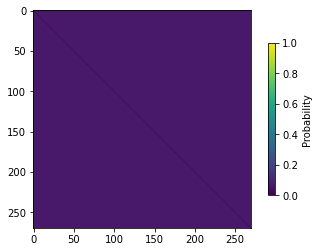

In [12]:
# define ER model
er = SBM(N, seed=0)
P = er.add_level(n_blocks=1,p_in=er_p_in,p_out=0,weight=1)

print("Expected number of edges:", round(er.n_expected_edges,3))
print("Expected sparsity:",round(er.expected_sparsity,3))

# plot probability matrix
fig, ax = plt.subplots(1)
im = ax.imshow(er.P, vmin=0, vmax=1)
cbar = plt.colorbar(im,shrink=0.7)
cbar.set_label("Probability")

100%|██████████| 200/200 [00:50<00:00,  3.96it/s]


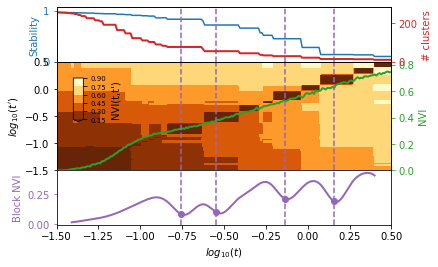

In [8]:
# Run MS analysis for a single sample
A_er, permutation_er = er.sample()
ms_results_er = pgs.run(A_er,min_scale= min_scale,max_scale= max_scale,n_scale= n_scale,n_workers=4, constructor="continuous_normalized")
pgs.plot_scan(ms_results_er)
plt.show()

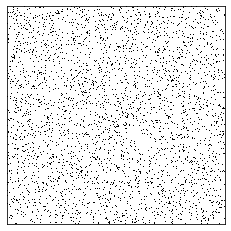

In [23]:
# plot adjacency matrix of single sample
fig, ax = plt.subplots(1)
im = ax.matshow(A_er, interpolation="nearest",cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('figures/Sample_ER.pdf', bbox_inches='tight')

In [11]:
# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(ms_results_er["community_id"],np.log10(ms_results_er['scales']))

# plot Sankey
fig = mcf.plot_sankey(step=2)
fig.write_image("figures/ER_Sankey.svg")

100%|██████████| 100/100 [00:01<00:00, 88.14it/s]


Average persistent hierarchy: 0.2679


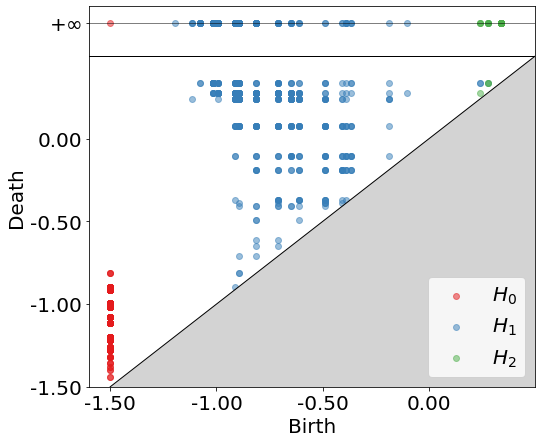

In [10]:
# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd()

# b) sSBM (1 scale, hierarchical)

In [24]:
# compute p_in so that we get desired expected number of edges
p_in_range = np.linspace(0,1,5000)
n_edges = np.zeros_like(p_in_range)

for i, p_in in enumerate(p_in_range):

    ssbm_temp = SBM(N, seed=1)

    P = ssbm_temp.add_level(n_blocks=n_blocks_ssbm,p_in=p_in,p_out=p_out,weight=1)
    n_edges[i] = ssbm_temp.n_expected_edges

ssbm_p_in = p_in_range[np.argmin(np.abs(n_edges-N_EDGES))]
print("sSBM p_in:", round(ssbm_p_in,5))

sSBM p_in: 0.20604


Expected number of edges: 2499.885
Expected sparsity: 0.069


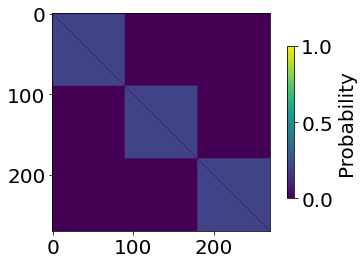

In [25]:
# define sSBM model
ssbm = SBM(N, seed=1)
P = ssbm.add_level(n_blocks=n_blocks_ssbm,p_in=ssbm_p_in,p_out=p_out,weight=1)

print("Expected number of edges:", round(ssbm.n_expected_edges,3))
print("Expected sparsity:",round(ssbm.expected_sparsity,3))

# plot probability matrix
fig, ax = plt.subplots(1)
im = ax.imshow(ssbm.P, vmin=0, vmax=1)
cbar = plt.colorbar(im,shrink=0.7)
cbar.set_label("Probability")

100%|██████████| 200/200 [00:32<00:00,  6.25it/s]


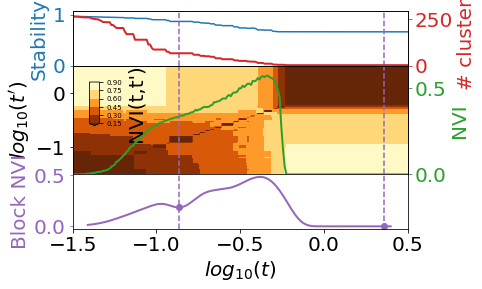

In [26]:
# Run MS analysis for single sample
A_ssbm, permutation_ssbm = ssbm.sample()
ms_results_ssbm = pgs.run(A_ssbm,min_scale= min_scale,max_scale= max_scale,n_scale= n_scale,n_workers=4, constructor="continuous_normalized")
pgs.plot_scan(ms_results_ssbm)
plt.show()

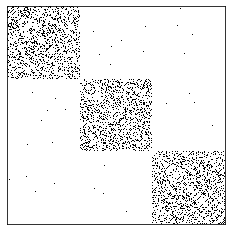

In [40]:
# retrieve ordered adjacency matrix by inverting permutation
A_ssbm_ordered = A_ssbm.copy()
A_ssbm_ordered = A_ssbm_ordered[np.argsort(permutation_ssbm)]  # shuffle rows
A_ssbm_ordered = (A_ssbm_ordered.T[np.argsort(permutation_ssbm)]).T  # shuffle columns consistently

# plot adjacency matrix of single sample
fig, ax = plt.subplots(1)
im = ax.matshow(A_ssbm_ordered, interpolation="nearest",cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('figures/Sample_sSBM.pdf', bbox_inches='tight')

In [28]:
# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(ms_results_ssbm["community_id"],np.log10(ms_results_ssbm['scales']))

# plot Sankey
fig = mcf.plot_sankey(step=2)
fig.write_image("figures/Sankey_sSBM.svg")

100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


Average persistent hierarchy: 0.5137


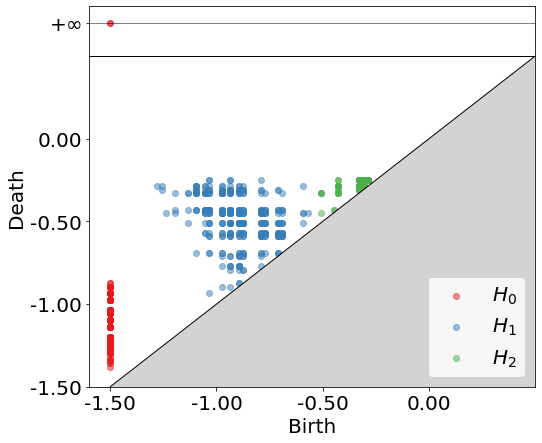

In [16]:
# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd()

# c) mSBM (3 scales, hierarchical)

In [29]:
# compute p_in so that we get desired expected number of edges
p_in_range = np.linspace(0,1,5000)
n_edges = np.zeros_like(p_in_range)

for i, p_in in enumerate(p_in_range):

    msbm_temp = SBM(N, seed=2)
    msbm_temp.add_level(n_blocks=n_blocks_msbm_c,p_in=p_in,p_out=p_out,weight=1)
    msbm_temp.add_level(n_blocks=n_blocks_msbm_m,p_in=p_in,p_out=p_out,weight=3)
    msbm_temp.add_level(n_blocks=n_blocks_msbm_f,p_in=p_in,p_out=p_out,weight=10)

    n_edges[i] = msbm_temp.n_expected_edges

msbm_p_in = p_in_range[np.argmin(np.abs(n_edges-N_EDGES))]
print("mSBM p_in:", round(msbm_p_in,5))

mSBM p_in: 0.96159


Expected number of edges: 2500.234
Expected sparsity: 0.069


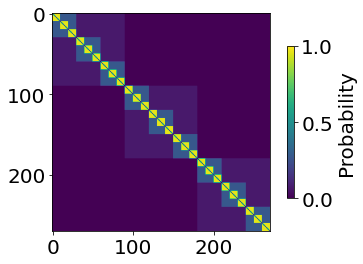

In [30]:
# define mSBM
msbm = SBM(N, seed=2)
msbm.add_level(n_blocks=n_blocks_msbm_c,p_in=msbm_p_in,p_out=p_out,weight=1)
msbm.add_level(n_blocks=n_blocks_msbm_m,p_in=msbm_p_in,p_out=p_out,weight=3)
msbm.add_level(n_blocks=n_blocks_msbm_f,p_in=msbm_p_in,p_out=p_out,weight=10)

print("Expected number of edges:", round(msbm.n_expected_edges,3))
print("Expected sparsity:",round(msbm.expected_sparsity,3))

# plot probability matrix
fig, ax = plt.subplots(1)
im = ax.imshow(msbm.P, vmin=0, vmax=1)
cbar = plt.colorbar(im,shrink=0.7)
cbar.set_label("Probability")

100%|██████████| 200/200 [00:29<00:00,  6.81it/s]


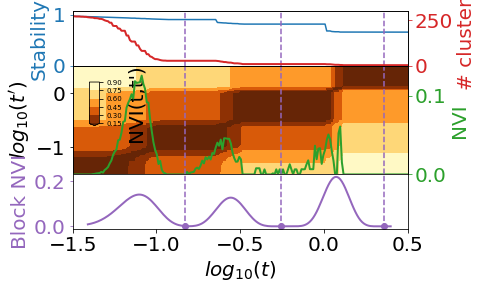

In [31]:
# Run MS analysis
A_msbm, permutation_msbm = msbm.sample()
ms_results_msbm = pgs.run(A_msbm,min_scale= min_scale,max_scale= max_scale,n_scale= n_scale,n_workers=4, constructor="continuous_normalized")
pgs.plot_scan(ms_results_msbm)
plt.show()

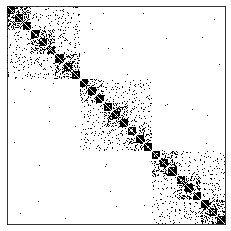

In [41]:
# retrieve ordered adjacency matrix by inverting permutation
A_msbm_ordered = A_msbm.copy()
A_msbm_ordered = A_msbm_ordered[np.argsort(permutation_msbm)]  # shuffle rows
A_msbm_ordered = (A_msbm_ordered.T[np.argsort(permutation_msbm)]).T  # shuffle columns consistently

# plot adjacency matrix
fig, ax = plt.subplots(1)
im = ax.matshow(A_msbm_ordered, interpolation="nearest",cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('figures/Sample_mSBM.pdf', bbox_inches='tight')

In [33]:
# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(ms_results_msbm["community_id"],np.log10(ms_results_msbm['scales']))

# plot Sankey
fig = mcf.plot_sankey(step=2)
fig.write_image("figures/Sankey_mSBM.svg")

100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


Average persistent hierarchy: 0.5697


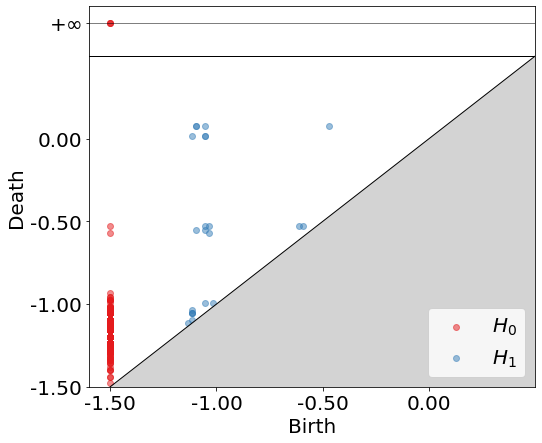

In [62]:
# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd()

# d) nh-mSBM (3 scales, non-hierarchical)

In [34]:
# compute p_in so that we get desired expected number of edges
p_in_range = np.linspace(0,1,5000)
n_edges = np.zeros_like(p_in_range)

for i, p_in in enumerate(p_in_range):

    nhmsbm_temp = SBM(N, seed=3)
    nhmsbm_temp.add_level(n_blocks=n_blocks_nhmsbm_c,p_in=p_in,p_out=p_out,weight=1)
    nhmsbm_temp.add_level(n_blocks=n_blocks_nhmsbm_m,p_in=p_in,p_out=p_out,weight=2.25)
    nhmsbm_temp.add_level(n_blocks=n_blocks_nhmsbm_f,p_in=p_in,p_out=p_out,weight=13)

    n_edges[i] = nhmsbm_temp.n_expected_edges

nhmsbm_p_in = p_in_range[np.argmin(np.abs(n_edges-N_EDGES))]
print("nh-mSBM p_in:", round(nhmsbm_p_in,5))

nh-mSBM p_in: 0.91278


Expected number of edges: 2500.022
Expected sparsity: 0.069


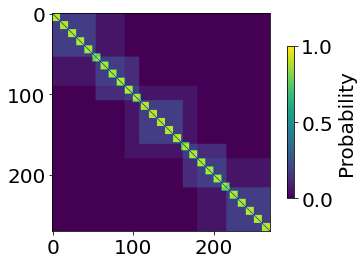

In [35]:
# define nh-mSBM
nhmsbm = SBM(N, seed=4)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_c,p_in=nhmsbm_p_in,p_out=p_out,weight=1)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_m,p_in=nhmsbm_p_in,p_out=p_out,weight=2.25)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_f,p_in=nhmsbm_p_in,p_out=p_out,weight=13)

print("Expected number of edges:", round(nhmsbm.n_expected_edges,3))
print("Expected sparsity:",round(nhmsbm.expected_sparsity,3))

# plot probability matrix
fig, ax = plt.subplots(1)
im = ax.imshow(nhmsbm.P, vmin=0, vmax=1)
cbar = plt.colorbar(im,shrink=0.7)
cbar.set_label("Probability")

100%|██████████| 200/200 [00:35<00:00,  5.68it/s]


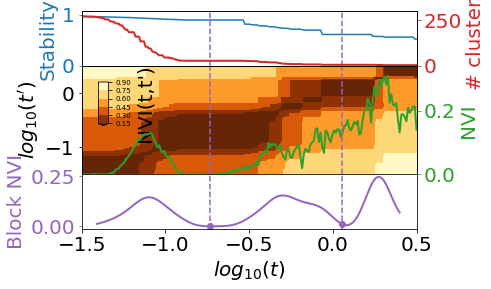

In [36]:
# Run MS analysis for single sample
A_nhmsbm, permutation_nhmsbm = nhmsbm.sample()
ms_results_nhmsbm = pgs.run(A_nhmsbm,min_scale= min_scale,max_scale= max_scale,n_scale= n_scale,n_workers=4, constructor="continuous_normalized")
pgs.plot_scan(ms_results_nhmsbm)
plt.show()

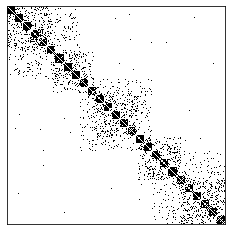

In [42]:
# retrieve ordered adjacency matrix by inverting permutation
A_nhmsbm_ordered = A_nhmsbm.copy()
A_nhmsbm_ordered = A_nhmsbm_ordered[np.argsort(permutation_nhmsbm)]  # shuffle rows
A_nhmsbm_ordered = (A_nhmsbm_ordered.T[np.argsort(permutation_nhmsbm)]).T  # shuffle columns consistently

# plot adjacency matrix of single sample
fig, ax = plt.subplots(1)
im = ax.matshow(A_nhmsbm_ordered, interpolation="nearest",cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig('figures/Sample_nhmSBM.pdf', bbox_inches='tight')

In [38]:
# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(ms_results_nhmsbm["community_id"],np.log10(ms_results_nhmsbm['scales']))

# plot Sankey
fig = mcf.plot_sankey(step=2)
fig.write_image("figures/Sankey_nhmSBM.svg")

100%|██████████| 200/200 [00:34<00:00,  5.73it/s]


Average persistent hierarchy: 0.3498


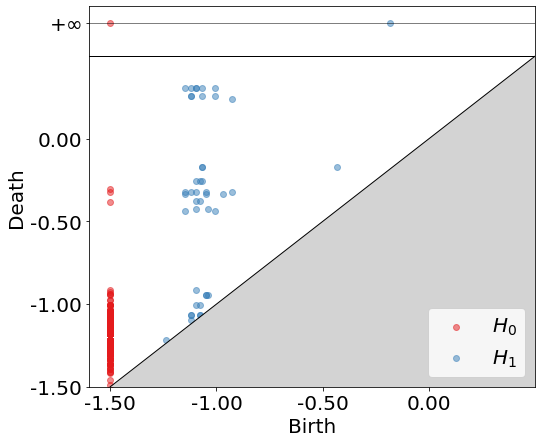

In [94]:
# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd()